In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv("/Users/ponnadadivesh/Downloads/IBM/project/adult 3.csv")

In [4]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
print(data.age.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [9]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [10]:
print(data.fnlwgt.value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64


In [11]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [12]:
print(data['educational-num'].value_counts())

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64


In [13]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [14]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [15]:
print(data.relationship.value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [16]:
print(data.race.value_counts())

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [17]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [18]:
print(data['capital-gain'].value_counts())

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [19]:
print(data['capital-loss'].value_counts())

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64


In [20]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64


In [21]:
print(data['native-country'].value_counts())

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [22]:
print(data.income.value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [23]:
data.workclass.replace({'?':'others'},inplace=True)

/var/folders/47/8rljqbkx5417r2rgz6_yyr100000gn/T/ipykernel_46881/3308181106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'others'},inplace=True)


In [24]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [25]:
data.occupation.replace({'?':'other'},inplace=True)

/var/folders/47/8rljqbkx5417r2rgz6_yyr100000gn/T/ipykernel_46881/3644256424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'other'},inplace=True)


In [26]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
other                2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [27]:
data.occupation.replace({'?':'other'},inplace=True)

In [28]:
print(data['native-country'].value_counts())

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [29]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [30]:
data=data[data['workclass'] != 'Without-pay']
data=data[data['workclass'] != 'Never-worked']

In [31]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [32]:
#redundancy

In [33]:
data.drop(columns=['education'],inplace=True)

In [34]:
data.drop(columns=['relationship'],inplace=True)

In [35]:
data.drop(columns=['race'],inplace=True)

In [36]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,18,others,103497,10,Never-married,other,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


In [37]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64


In [38]:
data=data[data['marital-status'] != 'Separated']
data=data[data['marital-status'] != 'Married-spouse-absent']
data=data[data['marital-status'] != 'Married-AF-spouse']

In [39]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse    22365
Never-married         16104
Divorced               6632
Widowed                1517
Name: count, dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
#encoding

In [42]:
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])

In [43]:
#splitting dataset

In [44]:
x=data.drop(columns=['income']) #input
y=data['income']    #output
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,2,6,1,0,0,40,39
1,38,2,89814,9,1,4,1,0,0,50,39
2,28,1,336951,12,1,10,1,0,0,40,39
3,44,2,160323,10,1,6,1,7688,0,40,39
4,18,6,103497,10,2,14,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,1,12,0,0,0,38,39
48838,40,2,154374,9,1,6,1,0,0,40,39
48839,58,2,151910,9,3,0,0,0,0,40,39
48840,22,2,201490,9,2,0,1,0,0,20,39


In [45]:
#outliers

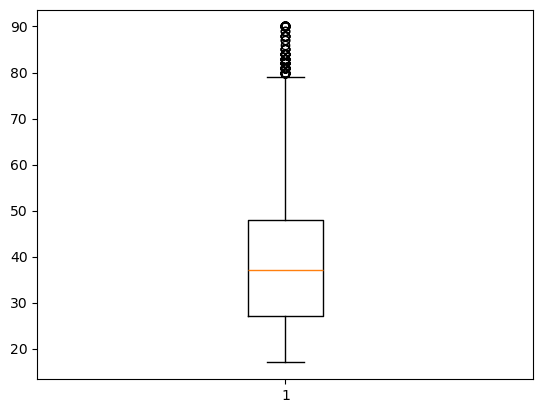

In [46]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [47]:
data=data[(data['age']<=75)& (data['age']>=17)]

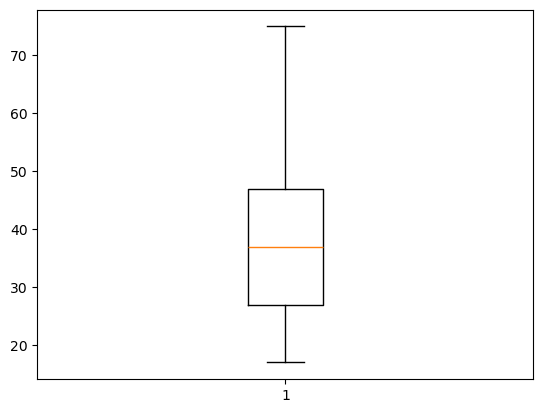

In [48]:
plt.boxplot(data['age'])
plt.show()

In [49]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,2,6,1,0,0,40,39,<=50K
1,38,2,89814,9,1,4,1,0,0,50,39,<=50K
2,28,1,336951,12,1,10,1,0,0,40,39,>50K
3,44,2,160323,10,1,6,1,7688,0,40,39,>50K
4,18,6,103497,10,2,14,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,1,12,0,0,0,38,39,<=50K
48838,40,2,154374,9,1,6,1,0,0,40,39,>50K
48839,58,2,151910,9,3,0,0,0,0,40,39,<=50K
48840,22,2,201490,9,2,0,1,0,0,20,39,<=50K


In [50]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,2,6,1,0,0,40,39
1,38,2,89814,9,1,4,1,0,0,50,39
2,28,1,336951,12,1,10,1,0,0,40,39
3,44,2,160323,10,1,6,1,7688,0,40,39
4,18,6,103497,10,2,14,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,1,12,0,0,0,38,39
48838,40,2,154374,9,1,6,1,0,0,40,39
48839,58,2,151910,9,3,0,0,0,0,40,39
48840,22,2,201490,9,2,0,1,0,0,20,39


In [51]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 46618, dtype: object

In [52]:
data.shape

(46257, 12)

In [53]:
#normalize data using scaling techniques

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.10958904, 0.33333333, 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.28767123, 0.33333333, 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.15068493, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.33333333, 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.33333333, 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.5       , 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
xtrain

array([[0.05479452, 0.16666667, 0.17898134, ..., 0.        , 0.19387755,
        0.95121951],
       [0.06849315, 0.33333333, 0.04004019, ..., 0.        , 0.24489796,
        0.95121951],
       [0.16438356, 0.33333333, 0.04889674, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.08219178, 0.33333333, 0.11378682, ..., 0.        , 0.39795918,
        0.95121951],
       [0.12328767, 0.33333333, 0.11002933, ..., 0.        , 0.39795918,
        0.95121951],
       [0.82191781, 0.33333333, 0.05140601, ..., 0.        , 0.19387755,
        0.95121951]])

In [58]:
# ML algorithm (supervised)

In [59]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
import joblib

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
    "MLPClassifier": MLPClassifier(solver='adam', hidden_layer_sizes=(5,2), random_state=2, max_iter=2000)
}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe. fit(xtrain, ytrain)
    predict = pipe.predict(xtest)
    acc = accuracy_score (ytest, predict)
    results [name] = acc
    print(f" {name} Accuracy: {acc:.4f}")
    print(classification_report(ytest, predict))

 LogisticRegression Accuracy: 0.8211
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7021
        >50K       0.71      0.46      0.56      2303

    accuracy                           0.82      9324
   macro avg       0.78      0.70      0.72      9324
weighted avg       0.81      0.82      0.81      9324

 RandomForest Accuracy: 0.8539
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7021
        >50K       0.74      0.63      0.68      2303

    accuracy                           0.85      9324
   macro avg       0.81      0.78      0.79      9324
weighted avg       0.85      0.85      0.85      9324

 KNN Accuracy: 0.8318
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7021
        >50K       0.68      0.60      0.64      2303

    accuracy                           0.83      9324
   macro avg       0.78      0.76     

<function matplotlib.pyplot.show(close=None, block=None)>

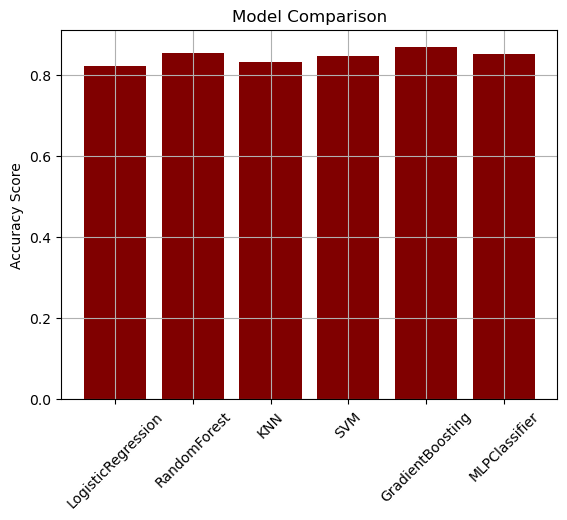

In [62]:
plt.bar(results.keys(), results.values(), color='maroon') 
plt.ylabel('Accuracy Score') 
plt.title('Model Comparison') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show

In [63]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


✅ Best model: GradientBoosting with accuracy 0.8670
✅ Saved best model as best_model.pkl


In [64]:
%%writefile Untitled1.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Overwriting Untitled1.py


In [65]:
! pip install streamlit pyngrok

In [66]:
! ngrok authtoken 30BWJs3QMr7S321LEjIMeCiuXIb_7JUNJSfFF1k72mubggTNn

Authtoken saved to configuration file: /Users/ponnadadivesh/Library/Application Support/ngrok/ngrok.yml


In [67]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run_streamlit)
thread.start()

In [68]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print("Your Streamlit App is LIVE here:", public_url)


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  

2025-07-21 19:15:18.364 


Your Streamlit App is LIVE here: NgrokTunnel: "https://1a116c80a689.ngrok-free.app" -> "http://localhost:8501"
